In [250]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, Normalizer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

### Характеристика выбранного датасета:

__page_id__ | The unique identifier for that characters page within the wikia
<br>__name__ | The name of the character 
<br>__urlslug__ | The unique url within the wikia that takes you to the character 
<br>__ID__ | The identity status of the character (Secret Identity, Public identity, [on marvel only: No Dual Identity]) 
<br>__ALIGN__ | If the character is Good, Bad or Neutral 
<br>__EYE__ | Eye color of the character 
<br>__HAIR__ | Hair color of the character 
<br>__SEX__ | Sex of the character (e.g. Male, Female, etc.) 
<br>__GSM__ | If the character is a gender or sexual minority (e.g. Homosexual characters, bisexual characters) 
<br>__ALIVE__ | If the character is alive or deceased 
<br>__APPEARANCES__ | The number of appareances of the character in comic books (as of Sep. 2, 2014. Number will become increasingly out of date as time goes on.) 
<br>__FIRST APPEARANCE__ | The month and year of the character's first appearance in a comic book, if available 
<br>__YEAR__ | The year of the character's first appearance in a comic book, if available

In [251]:
dc = pd.read_csv('C:/Users/kotsi/dc-wikia-data.csv')

### 1.Обработка пропусков данных

In [252]:
dc.head()

page_id                         name                              urlslug  \
0     1422         Batman (Bruce Wayne)         \/wiki\/Batman_(Bruce_Wayne)   
1    23387        Superman (Clark Kent)        \/wiki\/Superman_(Clark_Kent)   
2     1458   Green Lantern (Hal Jordan)   \/wiki\/Green_Lantern_(Hal_Jordan)   
3     1659     James Gordon (New Earth)     \/wiki\/James_Gordon_(New_Earth)   
4     1576  Richard Grayson (New Earth)  \/wiki\/Richard_Grayson_(New_Earth)   

                ID            ALIGN         EYE        HAIR              SEX  \
0  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   
1  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   
2  Secret Identity  Good Characters  Brown Eyes  Brown Hair  Male Characters   
3  Public Identity  Good Characters  Brown Eyes  White Hair  Male Characters   
4  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   

   GSM              ALIVE  APPEARANCES FIRST APPEARANCE    YEAR  
0  NaN  Living Characters       3093.0        1939, May  1939.0  
1  NaN  Living Characters       2496.0    1986, October  1986.0  
2  NaN  Living Characters       1565.0    1959, October  1959.0  
3  NaN  Living Characters       1316.0   1987, February  1987.0  
4  NaN  Living Characters       1237.0      1940, April  1940.0

In [253]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
page_id             6896 non-null int64
name                6896 non-null object
urlslug             6896 non-null object
ID                  4883 non-null object
ALIGN               6295 non-null object
EYE                 3268 non-null object
HAIR                4622 non-null object
SEX                 6771 non-null object
GSM                 64 non-null object
ALIVE               6893 non-null object
APPEARANCES         6541 non-null float64
FIRST APPEARANCE    6827 non-null object
YEAR                6827 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 700.5+ KB


In [254]:
dc['FIRST APPEARANCE']=dc['FIRST APPEARANCE'].str[5:]
cat_cols = [c for c in dc.columns if dc[c].dtype.name == 'object']
num_cols=[c for c in dc.columns if dc[c].dtype.name != 'object']

In [255]:
dc[cat_cols].describe()

name                       urlslug  \
count                        6896                          6896   
unique                       6896                          6896   
top     Ernest Widdle (New Earth)  \/wiki\/Rees-Van_(New_Earth)   
freq                            1                             1   

                     ID           ALIGN        EYE        HAIR  \
count              4883            6295       3268        4622   
unique                3               4         17          17   
top     Public Identity  Bad Characters  Blue Eyes  Black Hair   
freq               2466            2895       1102        1574   

                    SEX                    GSM              ALIVE  \
count              6771                     64               6893   
unique                4                      2                  2   
top     Male Characters  Homosexual Characters  Living Characters   
freq               4783                     54               5200   

       FIRST APPEARANCE  
count              6827  
unique               14  
top              August  
freq                634

In [256]:
cat_dc=dc[cat_cols]
cat_dc.head()

name                              urlslug  \
0         Batman (Bruce Wayne)         \/wiki\/Batman_(Bruce_Wayne)   
1        Superman (Clark Kent)        \/wiki\/Superman_(Clark_Kent)   
2   Green Lantern (Hal Jordan)   \/wiki\/Green_Lantern_(Hal_Jordan)   
3     James Gordon (New Earth)     \/wiki\/James_Gordon_(New_Earth)   
4  Richard Grayson (New Earth)  \/wiki\/Richard_Grayson_(New_Earth)   

                ID            ALIGN         EYE        HAIR              SEX  \
0  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   
1  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   
2  Secret Identity  Good Characters  Brown Eyes  Brown Hair  Male Characters   
3  Public Identity  Good Characters  Brown Eyes  White Hair  Male Characters   
4  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   

   GSM              ALIVE FIRST APPEARANCE  
0  NaN  Living Characters              May  
1  NaN  Living Characters          October  
2  NaN  Living Characters          October  
3  NaN  Living Characters         February  
4  NaN  Living Characters            April

In [258]:
num_dc=dc[num_cols]
num_dc.head()

page_id  APPEARANCES    YEAR
0     1422       3093.0  1939.0
1    23387       2496.0  1986.0
2     1458       1565.0  1959.0
3     1659       1316.0  1987.0
4     1576       1237.0  1940.0

In [259]:
dc.groupby('ID')['ID'].count()

ID
Identity Unknown       9
Public Identity     2466
Secret Identity     2408
Name: ID, dtype: int64

In [260]:
dc.loc[dc["ID"].isnull()].head()

page_id                       name                            urlslug  \
181    17885  Samuel Morgan (New Earth)  \/wiki\/Samuel_Morgan_(New_Earth)   
203   113540    Tubby Watts (New Earth)    \/wiki\/Tubby_Watts_(New_Earth)   
220     6063        Victory (New Earth)        \/wiki\/Victory_(New_Earth)   
251     1841        Dolphin (New Earth)        \/wiki\/Dolphin_(New_Earth)   
277   341732    Sugar Plumm (New Earth)    \/wiki\/Sugar_Plumm_(New_Earth)   

      ID            ALIGN         EYE         HAIR                SEX  GSM  \
181  NaN  Good Characters         NaN     Red Hair    Male Characters  NaN   
203  NaN  Good Characters         NaN     Red Hair    Male Characters  NaN   
220  NaN  Good Characters  Black Eyes   White Hair    Male Characters  NaN   
251  NaN  Good Characters   Blue Eyes  Silver Hair  Female Characters  NaN   
277  NaN  Good Characters         NaN   Blond Hair  Female Characters  NaN   

                   ALIVE  APPEARANCES FIRST APPEARANCE    YEAR  
181  Deceased Characters        155.0            March  1937.0  
203    Living Characters        137.0        September  1941.0  
220    Living Characters        130.0        September  1941.0  
251  Deceased Characters        115.0         December  1968.0  
277    Living Characters        105.0              May  1956.0

__Личность всех этих персонажей можно охарактеризовать как неизвестную__

In [261]:
dc['ID']=dc["ID"].fillna('Identity Unknown')

In [262]:
dc.groupby('ALIGN')['ALIGN'].count()

ALIGN
Bad Characters        2895
Good Characters       2832
Neutral Characters     565
Reformed Criminals       3
Name: ALIGN, dtype: int64

In [263]:
dc['ALIGN']=dc["ALIGN"].fillna('Neutral Characters')

In [264]:
dc.groupby('ALIGN')['ALIGN'].count()

ALIGN
Bad Characters        2895
Good Characters       2832
Neutral Characters    1166
Reformed Criminals       3
Name: ALIGN, dtype: int64

__Следующие признаки либо маловажны, либо заполнены практически целиком, так что их мы заполним наиболее частыми__

In [265]:
data_describe = dc.describe(include=[object])
for c in ['EYE','HAIR','SEX','ALIVE','FIRST APPEARANCE']:
    dc[c] = dc[c].fillna(data_describe[c]['top'])
dc.head()

page_id                         name                              urlslug  \
0     1422         Batman (Bruce Wayne)         \/wiki\/Batman_(Bruce_Wayne)   
1    23387        Superman (Clark Kent)        \/wiki\/Superman_(Clark_Kent)   
2     1458   Green Lantern (Hal Jordan)   \/wiki\/Green_Lantern_(Hal_Jordan)   
3     1659     James Gordon (New Earth)     \/wiki\/James_Gordon_(New_Earth)   
4     1576  Richard Grayson (New Earth)  \/wiki\/Richard_Grayson_(New_Earth)   

                ID            ALIGN         EYE        HAIR              SEX  \
0  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   
1  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   
2  Secret Identity  Good Characters  Brown Eyes  Brown Hair  Male Characters   
3  Public Identity  Good Characters  Brown Eyes  White Hair  Male Characters   
4  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   

   GSM              ALIVE  APPEARANCES FIRST APPEARANCE    YEAR  
0  NaN  Living Characters       3093.0              May  1939.0  
1  NaN  Living Characters       2496.0          October  1986.0  
2  NaN  Living Characters       1565.0          October  1959.0  
3  NaN  Living Characters       1316.0         February  1987.0  
4  NaN  Living Characters       1237.0            April  1940.0

__Введем гетеросексуальную ориентацию и предположим, что все остальные супергерои действительно таковы__

In [266]:
dc['GSM']=dc["GSM"].fillna('Heterosexual Characters')

__Посмотрим, все ли заполнили__

In [267]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
page_id             6896 non-null int64
name                6896 non-null object
urlslug             6896 non-null object
ID                  6896 non-null object
ALIGN               6896 non-null object
EYE                 6896 non-null object
HAIR                6896 non-null object
SEX                 6896 non-null object
GSM                 6896 non-null object
ALIVE               6896 non-null object
APPEARANCES         6541 non-null float64
FIRST APPEARANCE    6896 non-null object
YEAR                6827 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 700.5+ KB


### Заполним числовые признаки

In [268]:
dc[num_cols] = dc[num_cols].fillna(dc[num_cols].median(axis=0), axis=0)

__Проеведем еще небольшое преобразование данных, отсечем год в столбце "Первое появление" и преобразуем некоторые типы__

In [270]:
dc[['YEAR','APPEARANCES']]=dc[['YEAR','APPEARANCES']].astype(int)
dc.head()

page_id                         name                              urlslug  \
0     1422         Batman (Bruce Wayne)         \/wiki\/Batman_(Bruce_Wayne)   
1    23387        Superman (Clark Kent)        \/wiki\/Superman_(Clark_Kent)   
2     1458   Green Lantern (Hal Jordan)   \/wiki\/Green_Lantern_(Hal_Jordan)   
3     1659     James Gordon (New Earth)     \/wiki\/James_Gordon_(New_Earth)   
4     1576  Richard Grayson (New Earth)  \/wiki\/Richard_Grayson_(New_Earth)   

                ID            ALIGN         EYE        HAIR              SEX  \
0  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   
1  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   
2  Secret Identity  Good Characters  Brown Eyes  Brown Hair  Male Characters   
3  Public Identity  Good Characters  Brown Eyes  White Hair  Male Characters   
4  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   

                       GSM              ALIVE  APPEARANCES FIRST APPEARANCE  \
0  Heterosexual Characters  Living Characters         3093              May   
1  Heterosexual Characters  Living Characters         2496          October   
2  Heterosexual Characters  Living Characters         1565          October   
3  Heterosexual Characters  Living Characters         1316         February   
4  Heterosexual Characters  Living Characters         1237            April   

   YEAR  
0  1939  
1  1986  
2  1959  
3  1987  
4  1940

In [271]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
page_id             6896 non-null int64
name                6896 non-null object
urlslug             6896 non-null object
ID                  6896 non-null object
ALIGN               6896 non-null object
EYE                 6896 non-null object
HAIR                6896 non-null object
SEX                 6896 non-null object
GSM                 6896 non-null object
ALIVE               6896 non-null object
APPEARANCES         6896 non-null int32
FIRST APPEARANCE    6896 non-null object
YEAR                6896 non-null int32
dtypes: int32(2), int64(1), object(10)
memory usage: 646.6+ KB


## Кодирование категориальных признаков

In [272]:
binary_headers=[]
non_binary_headers=[]
[binary_headers.append(c) for c in cat_cols if dc[c].nunique()==2 ]
[non_binary_headers.append(c) for c in cat_cols if dc[c].nunique()!=2 and c not in ('name','urlslug') ]
binary_columns=dc[binary_headers]
non_binary_columns=dc[non_binary_headers]

In [273]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(non_binary_columns['ALIGN'])
#находит все уникальные значения и строит таблицу для соответствия каждой категории 
#некоторому числу, затем преобразует значения в числа
non_binary_columns['ALIGN'].unique()

array(['Good Characters', 'Bad Characters', 'Neutral Characters',
       'Reformed Criminals'], dtype=object)

In [274]:
#le.inverse_transform([0, 1, 2, 3])-обратная трансформация
np.unique(cat_enc_le)

array([0, 1, 2, 3])

__результат__

In [275]:
### Так как подход так себе, обратимся к OneHot Encoding-у
non_binary_columns.head()

ID            ALIGN         EYE        HAIR              SEX  \
0  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   
1  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   
2  Secret Identity  Good Characters  Brown Eyes  Brown Hair  Male Characters   
3  Public Identity  Good Characters  Brown Eyes  White Hair  Male Characters   
4  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   

                       GSM FIRST APPEARANCE  
0  Heterosexual Characters              May  
1  Heterosexual Characters          October  
2  Heterosexual Characters          October  
3  Heterosexual Characters         February  
4  Heterosexual Characters            April

In [276]:
dc_cat = pd.get_dummies(dc[non_binary_headers])
dc_cat.head()

ID_Identity Unknown  ID_Public Identity  ID_Secret Identity  \
0                    0                   0                   1   
1                    0                   0                   1   
2                    0                   0                   1   
3                    0                   1                   0   
4                    0                   0                   1   

   ALIGN_Bad Characters  ALIGN_Good Characters  ALIGN_Neutral Characters  \
0                     0                      1                         0   
1                     0                      1                         0   
2                     0                      1                         0   
3                     0                      1                         0   
4                     0                      1                         0   

   ALIGN_Reformed Criminals  EYE_Amber Eyes  EYE_Auburn Hair  EYE_Black Eyes  \
0                         0               0                0               0   
1                         0               0                0               0   
2                         0               0                0               0   
3                         0               0                0               0   
4                         0               0                0               0   

              ...               FIRST APPEARANCE_ February  \
0             ...                                        0   
1             ...                                        0   
2             ...                                        0   
3             ...                                        1   
4             ...                                        0   

   FIRST APPEARANCE_ Holiday  FIRST APPEARANCE_ January  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   FIRST APPEARANCE_ July  FIRST APPEARANCE_ June  FIRST APPEARANCE_ March  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   

   FIRST APPEARANCE_ May  FIRST APPEARANCE_ November  \
0                      1                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   FIRST APPEARANCE_ October  FIRST APPEARANCE_ September  
0                          0                            0  
1                          1                            0  
2                          1                            0  
3                          0                            0  
4                          0                            0  

[5 rows x 62 columns]

In [277]:
dc.info()
num_cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
page_id             6896 non-null int64
name                6896 non-null object
urlslug             6896 non-null object
ID                  6896 non-null object
ALIGN               6896 non-null object
EYE                 6896 non-null object
HAIR                6896 non-null object
SEX                 6896 non-null object
GSM                 6896 non-null object
ALIVE               6896 non-null object
APPEARANCES         6896 non-null int32
FIRST APPEARANCE    6896 non-null object
YEAR                6896 non-null int32
dtypes: int32(2), int64(1), object(10)
memory usage: 646.6+ KB


['page_id', 'APPEARANCES', 'YEAR']

### Масштабирование данных

In [278]:
sc1 = MinMaxScaler()
dc1=[sc1.fit_transform(dc[[c]]) for c in ('APPEARANCES', 'YEAR')]

C:\Users\kotsi\Anaconda37\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\kotsi\Anaconda37\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


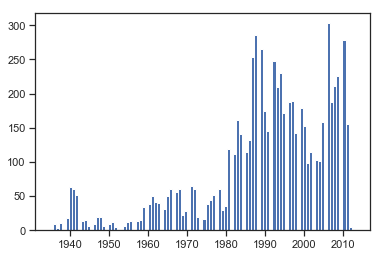

In [279]:
plt.hist(dc['YEAR'], 100)
plt.show()

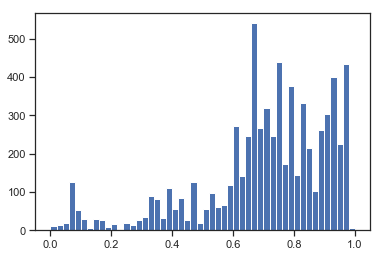

In [280]:
plt.hist(dc1[1], 50)
plt.show()

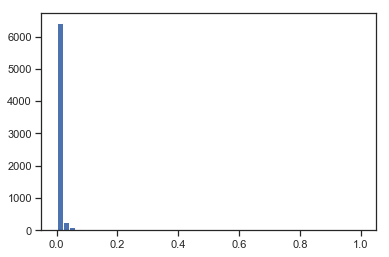

In [281]:
plt.hist(dc1[0], 50)
plt.show()

In [282]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(dc[['YEAR']])

C:\Users\kotsi\Anaconda37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kotsi\Anaconda37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


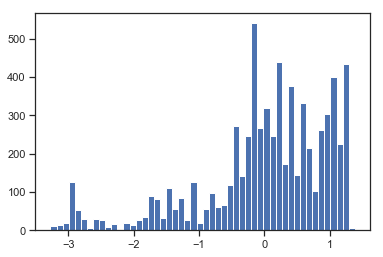

In [283]:

plt.hist(sc2_data, 50)
plt.show()

In [284]:
sc3 = Normalizer()
dc2= sc3.fit_transform(dc[['APPEARANCES', 'YEAR']])

In [285]:
dc2=pd.DataFrame(dc2)

In [286]:
dc2.columns=['APPEARANCES', 'YEAR']

In [287]:
dc2.head()

APPEARANCES      YEAR
0     0.847274  0.531156
1     0.782518  0.622628
2     0.624160  0.781297
3     0.552180  0.833725
4     0.537635  0.843178

In [288]:
dc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 2 columns):
APPEARANCES    6896 non-null float64
YEAR           6896 non-null float64
dtypes: float64(2)
memory usage: 107.8 KB


In [289]:
DC_BIG = pd.concat([dc_cat,dc2], axis=1)

In [290]:
DC_BIG.head()

ID_Identity Unknown  ID_Public Identity  ID_Secret Identity  \
0                    0                   0                   1   
1                    0                   0                   1   
2                    0                   0                   1   
3                    0                   1                   0   
4                    0                   0                   1   

   ALIGN_Bad Characters  ALIGN_Good Characters  ALIGN_Neutral Characters  \
0                     0                      1                         0   
1                     0                      1                         0   
2                     0                      1                         0   
3                     0                      1                         0   
4                     0                      1                         0   

   ALIGN_Reformed Criminals  EYE_Amber Eyes  EYE_Auburn Hair  EYE_Black Eyes  \
0                         0               0                0               0   
1                         0               0                0               0   
2                         0               0                0               0   
3                         0               0                0               0   
4                         0               0                0               0   

     ...     FIRST APPEARANCE_ January  FIRST APPEARANCE_ July  \
0    ...                             0                       0   
1    ...                             0                       0   
2    ...                             0                       0   
3    ...                             0                       0   
4    ...                             0                       0   

   FIRST APPEARANCE_ June  FIRST APPEARANCE_ March  FIRST APPEARANCE_ May  \
0                       0                        0                      1   
1                       0                        0                      0   
2                       0                        0                      0   
3                       0                        0                      0   
4                       0                        0                      0   

   FIRST APPEARANCE_ November  FIRST APPEARANCE_ October  \
0                           0                          0   
1                           0                          1   
2                           0                          1   
3                           0                          0   
4                           0                          0   

   FIRST APPEARANCE_ September  APPEARANCES      YEAR  
0                            0     0.847274  0.531156  
1                            0     0.782518  0.622628  
2                            0     0.624160  0.781297  
3                            0     0.552180  0.833725  
4                            0     0.537635  0.843178  

[5 rows x 64 columns]

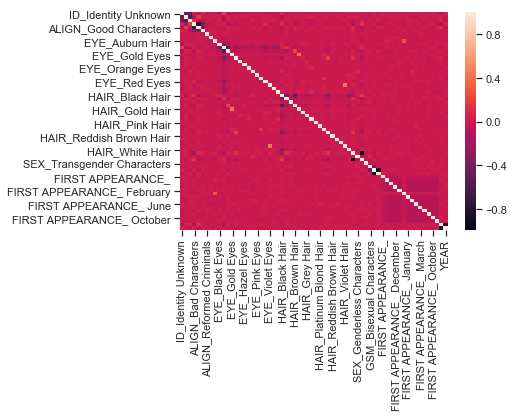

In [291]:
sns.heatmap(DC_BIG.corr())

In [293]:
DC_BIG.corr()

ID_Identity Unknown  ID_Public Identity  \
ID_Identity Unknown                     1.000000           -0.480554   
ID_Public Identity                     -0.480554            1.000000   
ID_Secret Identity                     -0.471791           -0.546508   
ALIGN_Bad Characters                    0.038176           -0.193260   
ALIGN_Good Characters                  -0.098667            0.177908   
ALIGN_Neutral Characters                0.079131            0.021019   
ALIGN_Reformed Criminals                0.001839           -0.001056   
EYE_Amber Eyes                         -0.017350            0.002383   
EYE_Auburn Hair                        -0.000525            0.014221   
EYE_Black Eyes                         -0.108599            0.040427   
EYE_Blue Eyes                           0.204582           -0.110448   
EYE_Brown Eyes                         -0.100039            0.065929   
EYE_Gold Eyes                          -0.005637            0.006550   
EYE_Green Eyes                         -0.054387            0.040541   
EYE_Grey Eyes                          -0.028224            0.022694   
EYE_Hazel Eyes                         -0.037260            0.051297   
EYE_Orange Eyes                         0.000568            0.011322   
EYE_Photocellular Eyes                 -0.050093           -0.018795   
EYE_Pink Eyes                           0.002601           -0.001494   
EYE_Purple Eyes                        -0.000743            0.006679   
EYE_Red Eyes                           -0.050264            0.040013   
EYE_Violet Eyes                        -0.026892            0.005145   
EYE_White Eyes                         -0.042140           -0.003485   
EYE_Yellow Eyes                        -0.006362            0.003398   
HAIR_Black Hair                         0.096029           -0.125523   
HAIR_Blond Hair                        -0.045332            0.027254   
HAIR_Blue Hair                         -0.016664            0.009203   
HAIR_Brown Hair                        -0.022754            0.064552   
HAIR_Gold Hair                         -0.005516            0.002383   
HAIR_Green Hair                        -0.017666           -0.003963   
...                                          ...                 ...   
HAIR_Purple Hair                       -0.020543            0.029190   
HAIR_Red Hair                          -0.035929            0.015926   
HAIR_Reddish Brown Hair                 0.001839           -0.001056   
HAIR_Silver Hair                        0.001839            0.013453   
HAIR_Strawberry Blond Hair             -0.021089            0.018970   
HAIR_Violet Hair                       -0.015517           -0.005408   
HAIR_White Hair                        -0.026924            0.048883   
SEX_Female Characters                   0.000176            0.041278   
SEX_Genderless Characters              -0.011043            0.021650   
SEX_Male Characters                     0.000639           -0.043479   
SEX_Transgender Characters              0.018698           -0.008985   
GSM_Bisexual Characters                -0.016174           -0.004580   
GSM_Heterosexual Characters             0.039086           -0.000359   
GSM_Homosexual Characters              -0.035537            0.002367   
FIRST APPEARANCE_                       0.017326           -0.001046   
FIRST APPEARANCE_ April                 0.017181            0.000668   
FIRST APPEARANCE_ August               -0.003294            0.022607   
FIRST APPEARANCE_ December             -0.011384            0.006289   
FIRST APPEARANCE_ February             -0.006509            0.018482   
FIRST APPEARANCE_ Holiday               0.007737            0.005060   
FIRST APPEARANCE_ January              -0.037392            0.004482   
FIRST APPEARANCE_ July                  0.028782           -0.047985   
FIRST APPEARANCE_ June                  0.021558           -0.032115   
FIRST APPEARANCE_ March                 0.017751            0.002541 

In [292]:
print(DC_BIG.corr()['APPEARANCES'].abs().sort_values(ascending=False).head(10))

APPEARANCES              1.000000
YEAR                     0.818192
ALIGN_Good Characters    0.141453
ALIGN_Bad Characters     0.140337
ID_Identity Unknown      0.137600
ID_Secret Identity       0.080220
EYE_Blue Eyes            0.062221
ID_Public Identity       0.050905
EYE_Green Eyes           0.050818
HAIR_Black Hair          0.050293
Name: APPEARANCES, dtype: float64
